# Lista 1

In [12]:
import sys
sys.path.append('..')
import numpy as np
from scipy.special import factorial, comb
import matplotlib.pyplot as plt
%matplotlib inline

from utils.math import gaussian

## Questão 1

## Questão 3

Primeiramente, vamos arbitrar que existem $N$ jogadores em campo nessa partida de futebol, e que eles podem fazer aniversário em $M$ dias do ano. Ao final, faremos os cálculos para o caso realista $(N,M) = (22, 365)$.

Atribuímos números de 1 a $N$ para cada jogador (não necessariamente os mesmos de suas camisas). Definimos a proposição $$E_i = \{\text{dos primeiros $i$ jogadores, nenhum faz aniversário na mesma data}\}.$$

Notamos que $\mathbb{P}(E_1) = 1$, e que $E_i \subset E_j$ se $i<j$. Em seguida, desenvolvemos

$$
\mathbb{P}(E_1, \ldots, E_n) = \mathbb{P}(E_n | E_{n-1}, \ldots, E_1) \mathbb{P}(E_1, \ldots, E_{n-1})
$$

A probabilidade condicional $\mathbb{P}(E_n | E_{n-1}, \ldots, E_1)$ depende do jogador $n$ não fazer aniversário nos mesmos dias dos demais, dado que nenhuma dessas datas coincide. Dessa maneira, assumindo uma probabilidade uniforme, o jogador $n$ tem exatamente $M - (n-1)$ datas possíveis. Portanto,

$$
\mathbb{P}(E_n | E_{n-1}, \ldots, E_1) = \frac{M - n + 1}{M}
$$

Obtém-se a relação de recorrência

\begin{align*}
\mathbb{P}(E_1, \ldots, E_n) = \frac{M - n + 1}{M} \mathbb{P}(E_1, \ldots, E_{n-1}),
\end{align*}

cuja solução é dada pelo produto

\begin{align*}
    \mathbb{P}(E_1, \ldots, E_n) &= \prod_{i=1}^n \frac{M - i + 1}{M}\\
    &= \frac{1}{M^n} \frac{M!}{(M-n)!}\\
    &= \frac{n!}{M^n} \binom{M}{n}
\end{align*}

Finalmente, a probabilidade de que ao menos dois jogadores tenham o mesmo aniversário é dada por $$\mathbb{P}(\overline{E_1, \ldots, E_n}) = 1 - \frac{n!}{M^n} \binom{M}{n}$$

Vamos visualizar essa probabilidade nas células abaixo.

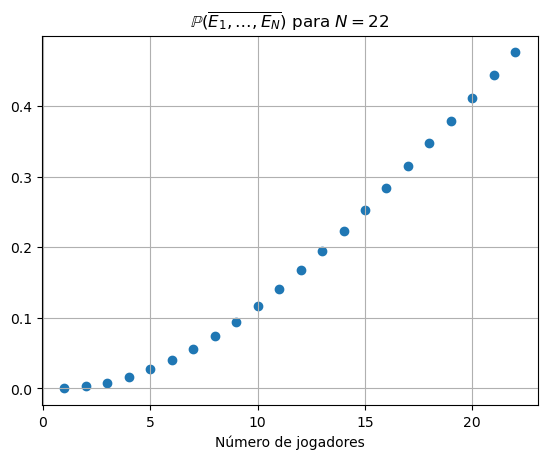

Probabilidade que ao menos dois jogadores tenham o mesmo aniversário
em uma partida de futebol: 47.6%



In [41]:
def same_birthday_prob(n, m):
    return 1 - factorial(n) * comb(m, n, exact=True) / m ** n
    #prob_en_given_ei = (m + 1 - np.arange(1, n + 1)) / m
    #return 1.0 - np.prod(prob_en_given_ei)

M = 365
N = 22
narr = np.arange(1, 23, dtype=np.int32)
probarr = [same_birthday_prob(i, M) for i in range(1, N + 1)]

# Plot probabilities over n
plt.scatter(narr, probarr)
plt.xlabel('Número de jogadores')
plt.title(r'$\mathbb{P}(\overline{E_1, \ldots, E_N})$ para $N=22$')
plt.grid()
plt.show()

# Print result for n = 22
text = f"""Probabilidade que ao menos dois jogadores tenham o mesmo aniversário
em uma partida de futebol: {(100 * probarr[-1]):.1f}%
"""
print(text)